In [1]:
'''
【课程1.2】  分布分析

分布分析 → 研究数据的分布特征和分布类型，分定量数据、定性数据区分基本统计量

极差 / 频率分布情况 / 分组组距及组数

'''

'\n【课程1.2】  分布分析\n\n分布分析 → 研究数据的分布特征和分布类型，分定量数据、定性数据区分基本统计量\n\n极差 / 频率分布情况 / 分组组距及组数\n\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

房屋编码      int64
小区       object
朝向       object
房屋单价      int64
参考首付    float64
参考总价    float64
经度      float64
纬度      float64
dtype: object


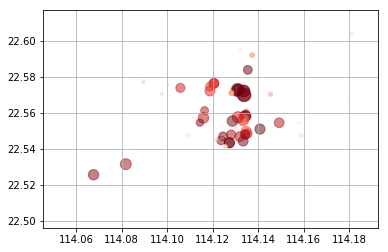

In [6]:
# 数据读取

data = pd.read_csv(r'D:\user_profile\python\basic statistics\data feature analysis\深圳罗湖二手房信息.csv',engine='python')

data.head()
print(data.dtypes)
'''
 通过数据可见，一共8个字段
 定量字段：房屋单价，参考首付，参考总价，*经度，*纬度，*房屋编码
 定性字段：小区，朝向
'''
plt.scatter(data['经度'],data['纬度'],
            s = data['房屋单价']/500,
            c = data['参考总价'],
            alpha = 0.5,cmap='Reds')
plt.grid()

In [7]:
# 极差：max-min
# 只针对定量字段

def d_range(df,*cols):                # 创建函数求极差
    krange = []
    for col in cols:
        crange = df[col].max() - df[col].min()
        krange.append(crange)
    return (krange)

key1 = '参考首付'
key2 = '参考总价'
dr = d_range(data,key1,key2)
print(f'{key1}的极差为{dr[0]},{key2}的极差为{dr[1]}')

参考首付的极差为52.5,参考总价的极差为175.0


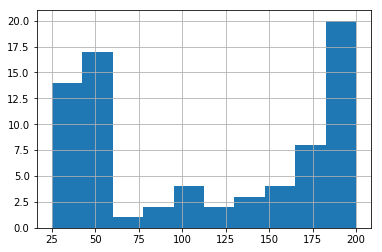

In [8]:
# 频率分布情况 - 定量字段
# ① 通过直方图直接判断分组组数

data[key2].hist(bins=10)           # 简单查看数据分布，确定分布组数 → 一般8-16即可
                                   # 这里以10组为参考

In [11]:
# 频率分布情况 - 定量字段
# ② 求出分组区间

gcut = pd.cut(data[key2],10,right=False)
gcut_count = gcut.value_counts(sort=False)

data[f'{key2}分组区间'] = gcut.values
data.head()
'''
 pd.cut(x, bins, right)：按照组数对x分组，且返回一个和x同样长度的分组dataframe，right → 是否右边包含，默认True
 通过groupby查看不同组的数据频率分布
 给源数据data添加“分组区间”列

'''

,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度,参考总价分组区间
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698,"[42.5, 60.0)"
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910,"[25.0, 42.5)"
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223,"[42.5, 60.0)"
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343,"[25.0, 42.5)"
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370,"[165.0, 182.5)"


In [22]:
# 频率分布情况 - 定量字段
# ③  求出目标字段下频率分布的其他统计量 → 频数，频率，累计频率

r_zj = pd.DataFrame(gcut_count)
r_zj.rename(columns={gcut_count.name:'频数'},inplace=True)              # 修改频数字段名
r_zj['频率'] = r_zj / r_zj['频数'].sum()                                # 计算频率
r_zj['累计频率'] = r_zj['频率'].cumsum()                                # 计算累计频率
r_zj['频率%'] = r_zj['频率'].apply(lambda x:'%.2f%%' %(x*100))          # 以百分比显示频率
r_zj['累计频率%'] = r_zj['累计频率'].apply(lambda x:'%.2f%%' %(x*100))  # 以百分比显示累计频率
r_zj.style.bar(subset=['频率','累计频率'],color='green',width=100)      # 可视化显示

,频数,频率,累计频率,频率%,累计频率%
"[25.0, 42.5)",14,0.186667,0.186667,18.67%,18.67%
"[42.5, 60.0)",17,0.226667,0.413333,22.67%,41.33%
"[60.0, 77.5)",1,0.0133333,0.426667,1.33%,42.67%
"[77.5, 95.0)",2,0.0266667,0.453333,2.67%,45.33%
"[95.0, 112.5)",4,0.0533333,0.506667,5.33%,50.67%
"[112.5, 130.0)",2,0.0266667,0.533333,2.67%,53.33%
"[130.0, 147.5)",3,0.04,0.573333,4.00%,57.33%
"[147.5, 165.0)",4,0.0533333,0.626667,5.33%,62.67%
"[165.0, 182.5)",8,0.106667,0.733333,10.67%,73.33%
"[182.5, 200.175)",20,0.266667,1,26.67%,100.00%


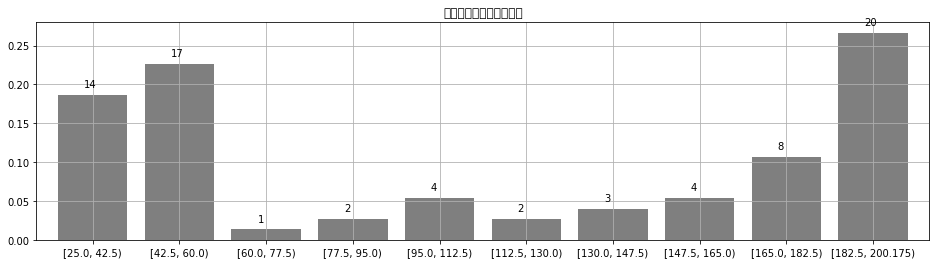

In [26]:
# 频率分布情况 - 定量字段
# ④ 绘制频率直方图

r_zj['频率'].plot(kind='bar',
                  width=0.8,
                  figsize=(16,4),
                  rot=0,
                  color='k',
                  grid=True,
                  alpha=0.5)
plt.title('参考总价分布频率直方图')

# 绘制直方图
x = len(r_zj)
y = r_zj['频率']
m = r_zj['频数']

for i,j,k in zip(range(x),y,m):
    plt.text(i-0.1,j+0.01,'%i'%k,color='k')

In [34]:
# 频率分布情况 - 定性字段
# ① 通过计数统计判断不同类别的频率

cx_g = data['朝向'].value_counts(sort=False)
print(cx_g)
r_cx = pd.DataFrame(cx_g)
r_cx.rename(columns={cx_g.name:'频数'},inplace=True)
r_cx['频率'] = r_cx['频数'] / r_cx['频数'].sum()
r_cx['累计频率'] = r_cx['频率'].cumsum()
r_cx['频率%'] = r_cx['频率'].apply(lambda x:'%.2f%%' %(x*100))
r_cx['累计频率%'] = r_cx['累计频率'].apply(lambda x:'%.2f%%' %(x*100))
r_cx.style.bar(subset=['频率','累计频率'],color='green',width=100)

南     20
西南     4
东      8
东南     5
南北    29
北      4
东北     1
西北     3
东西     1
Name: 朝向, dtype: int64


,频数,频率,累计频率,频率%,累计频率%
南,20,0.266667,0.266667,26.67%,26.67%
西南,4,0.0533333,0.32,5.33%,32.00%
东,8,0.106667,0.426667,10.67%,42.67%
东南,5,0.0666667,0.493333,6.67%,49.33%
南北,29,0.386667,0.88,38.67%,88.00%
北,4,0.0533333,0.933333,5.33%,93.33%
东北,1,0.0133333,0.946667,1.33%,94.67%
西北,3,0.04,0.986667,4.00%,98.67%
东西,1,0.0133333,1,1.33%,100.00%


(-1.108048759175461,
 1.1003832752736311,
 -1.1220483870347466,
 1.110656555304884)

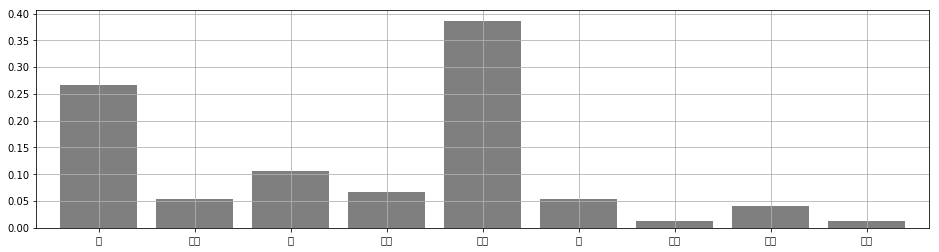

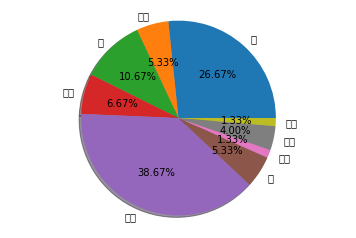

In [36]:
# 频率分布情况 - 定量字段
# ② 绘制频率直方图、饼图

plt.figure(num=1,figsize=(16,4))
r_cx['频率'].plot(kind='bar',        # 绘制直方图
                  width=0.8,
                  rot=0,
                  alpha=0.5,
                  color='k',
                  grid=True)

plt.figure(num=2)

plt.pie(r_cx['频数'],                # 绘制饼图
        labels=r_cx.index,
        autopct='%.2f%%',
        shadow=True)
plt.axis('equal')